# Import Libraries, Set Path, Import data.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
path = r'C:\Users\Chaot\Python stuff\06 - Utah Real Estate Housing Prices'
lp_month = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Utah Housing Datasets', 'list_price_monthly.csv'), index_col = False)
lp_quart = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Utah Housing Datasets', 'list_price_quarterly.csv'), index_col = False)

## Data set notes:
The two data sets that were imported were for the monthly average and median listing prices for homes in Utah, as well as the quarterly average and median listing prices. I selected all four as options to view as I believed it would be insightful.

In [56]:
lp_month['average_list_price'] = lp_month['average_list_price'].astype(float)
lp_month['median_list_price'] = lp_month['median_list_price'].astype(float)
lp_month['date'] = pd.to_datetime(lp_month['date'])
lp_quart['average_list_price'] = lp_quart['average_list_price'].astype(float)
lp_quart['median_list_price'] = lp_quart['median_list_price'].astype(float)
lp_quart['date'] = pd.to_datetime(lp_quart['date'])

In [57]:
lp_month.set_index(['date'], inplace = True)
lp_month.head()

,average_list_price,median_list_price
date,,
2016-07-01,557317.0,325000.0
2016-08-01,558076.0,324950.0
2016-09-01,563352.0,325000.0
2016-10-01,566602.0,326500.0
2016-11-01,569837.0,328925.0


In [58]:
lp_quart.set_index(['date'], inplace = True)
lp_quart.head()

,average_list_price,median_list_price
date,,
2016-07-01,559581.67,324983.33
2016-10-01,578003.33,329108.33
2017-01-01,639841.33,348641.67
2017-04-01,632497.00,360746.00
2017-07-01,599924.33,361035.67


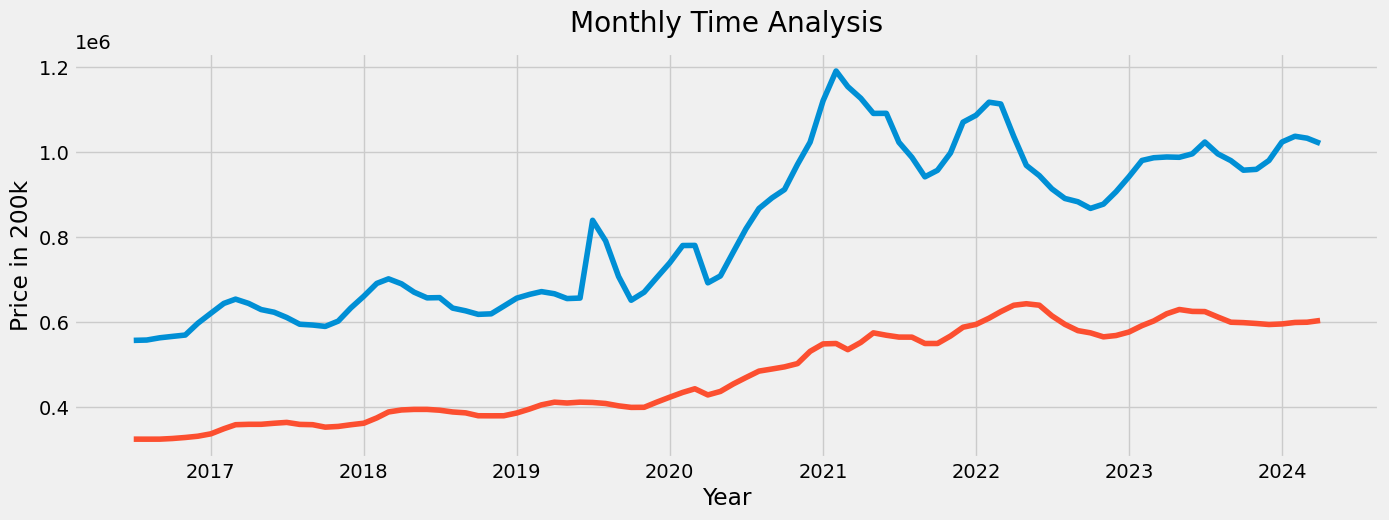

In [140]:
plt.figure(figsize =(15,5), dpi=100)
plt.xlabel('Year')
plt.ylabel('Price in 200k')
plt.title('Monthly Time Analysis',loc = 'center', pad=15)
lp_month_line = plt.plot(lp_month)
plt.savefig(os.path.join(path, 'Visualizations', 'Monthly Time Analysis'),bbox_inches='tight')

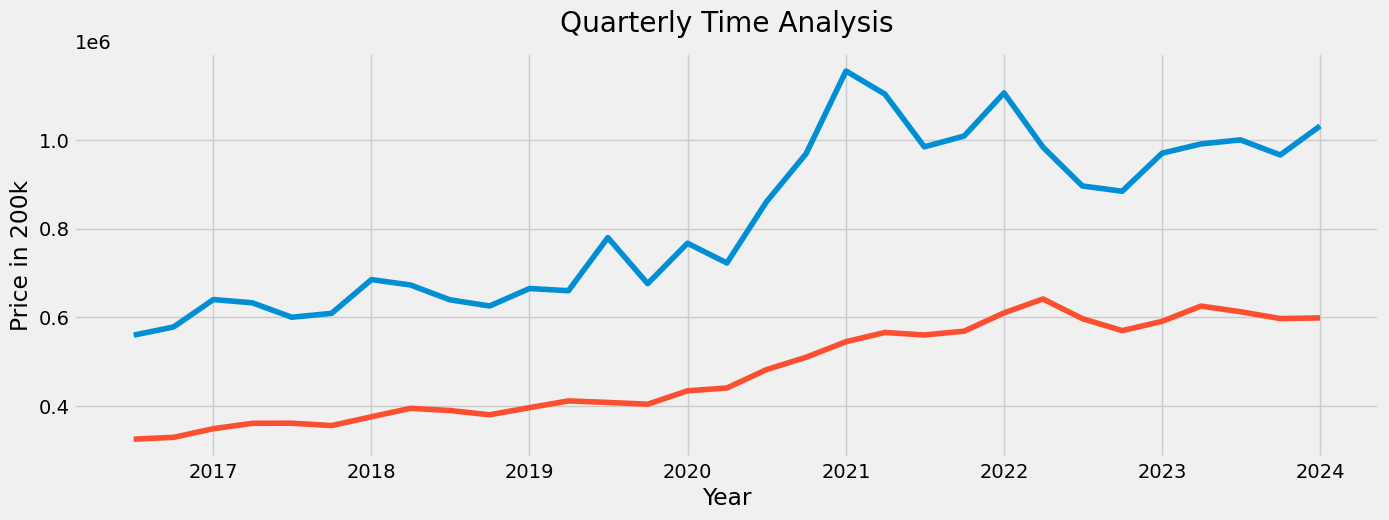

In [136]:
plt.figure(figsize =(15,5), dpi=100)
plt.xlabel('Year')
plt.ylabel('Price in 200k')
plt.title('Quarterly Time Analysis',loc = 'center', pad=15)
lp_quart_line = plt.plot(lp_quart)
plt.savefig(os.path.join(path, 'Visualizations', 'Quarterly Time Analysis'),bbox_inches='tight')

# Time Series Analysis

In [61]:
median_month = lp_month.drop(columns = ['average_list_price'])
avg_month = lp_month.drop(columns = ['median_list_price'])
median_quart = lp_quart.drop(columns = ['average_list_price'])
avg_quart = lp_quart.drop(columns = ['median_list_price'])

In [62]:
decom_median_month = sm.tsa.seasonal_decompose(median_month, model='additive')
decom_avg_month = sm.tsa.seasonal_decompose(avg_month, model='additive')
decom_median_quart = sm.tsa.seasonal_decompose(median_quart, model='additive')
decom_avg_quart = sm.tsa.seasonal_decompose(avg_quart, model='additive')

In [127]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 8

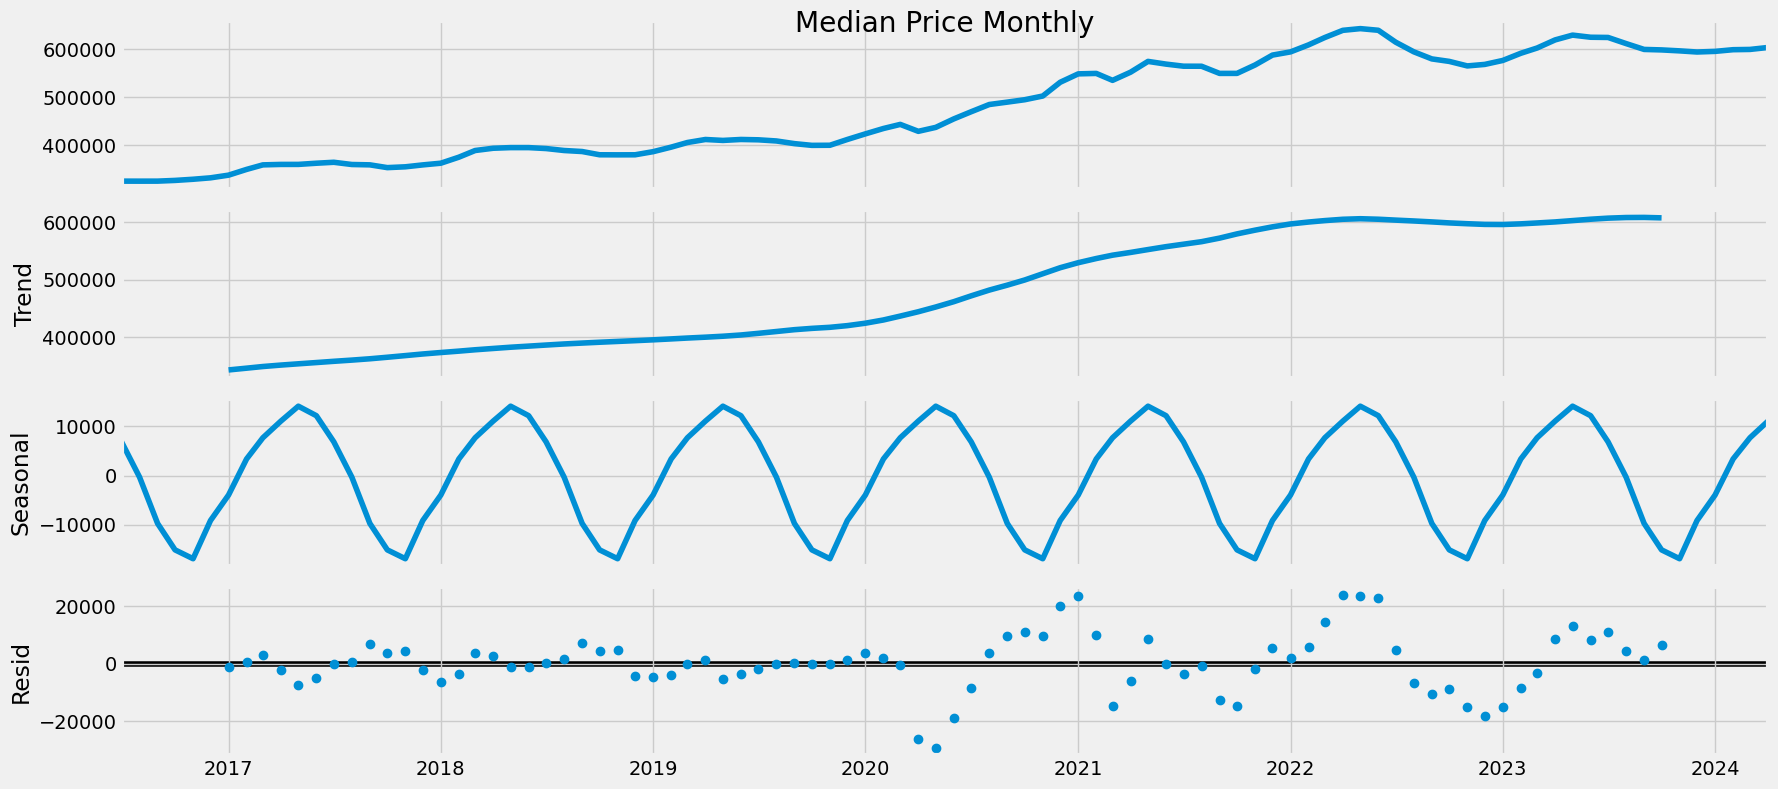

In [128]:
decom_median_month.plot()
plt.title('Median Price Monthly',loc = 'center', pad=400)
plt.savefig(os.path.join(path, 'Visualizations', 'Median Price Monthly'),bbox_inches='tight')
plt.show()

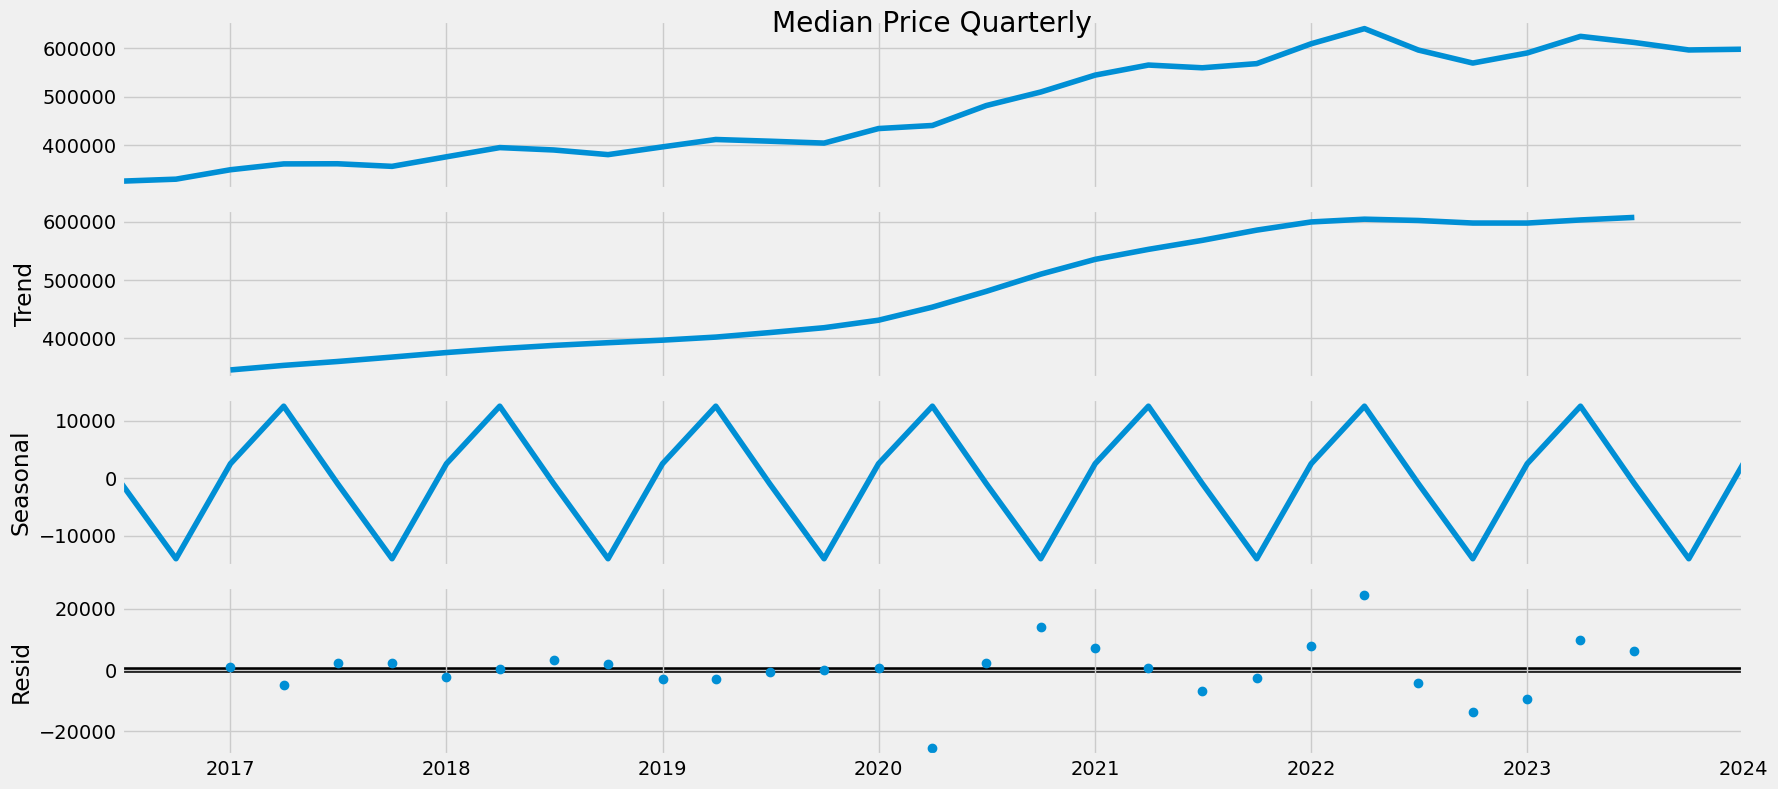

In [129]:
decom_median_quart.plot()
plt.title('Median Price Quarterly',loc = 'center', pad=400)
plt.savefig(os.path.join(path, 'Visualizations', 'Median Price Quarterly'),bbox_inches='tight')
plt.show()

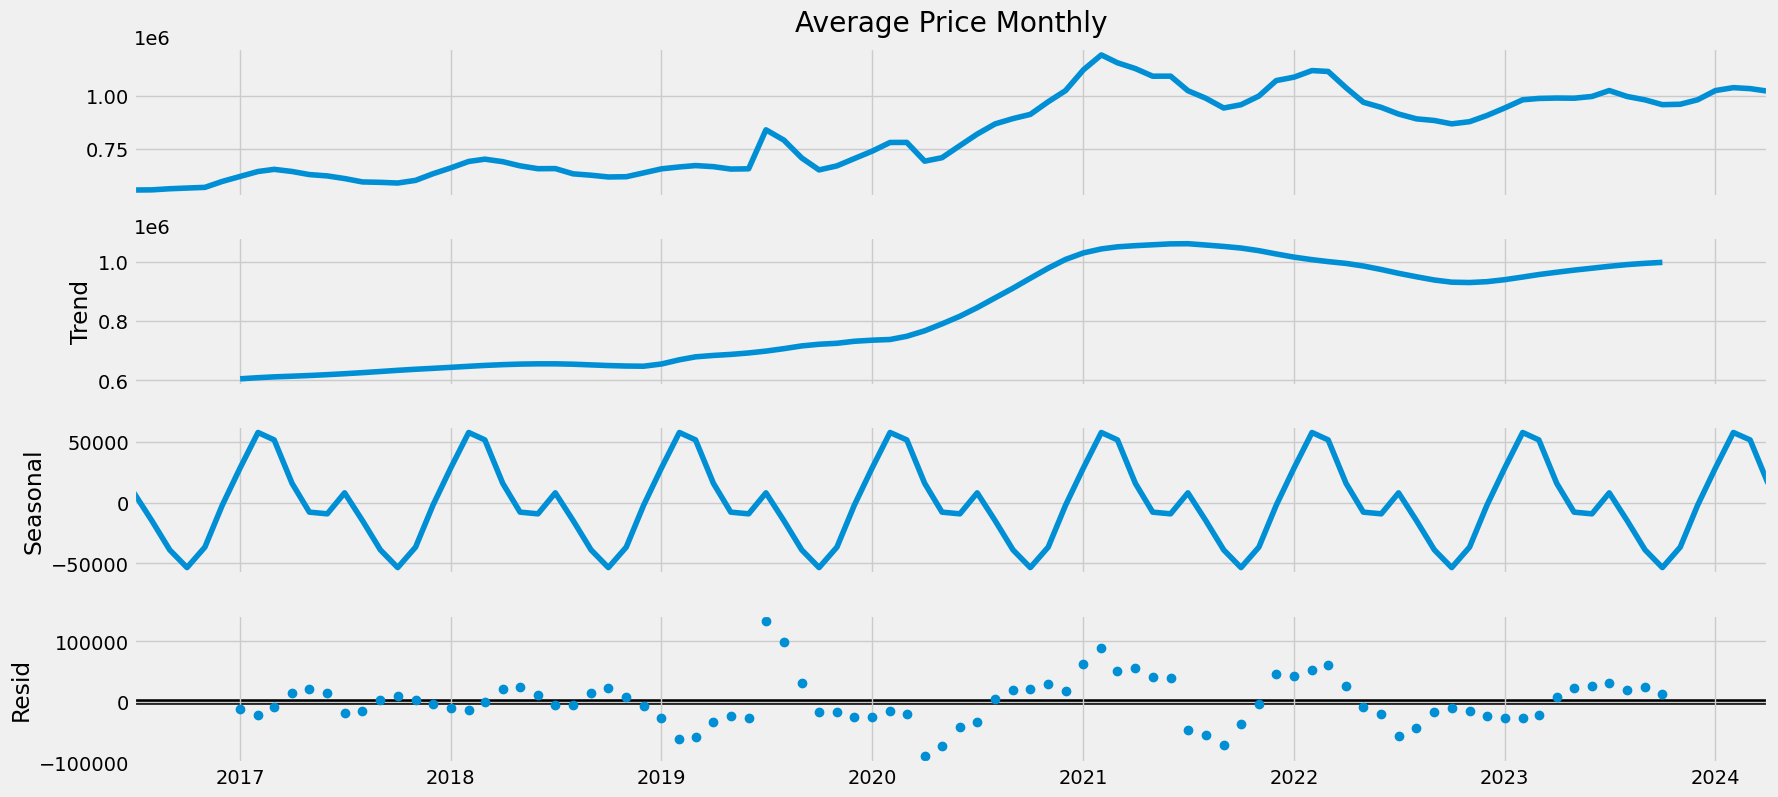

In [131]:
decom_avg_month.plot()
plt.title('Average Price Monthly',loc = 'center', pad=420)
plt.savefig(os.path.join(path, 'Visualizations', 'Average Price Monthly'),bbox_inches='tight')
plt.show()

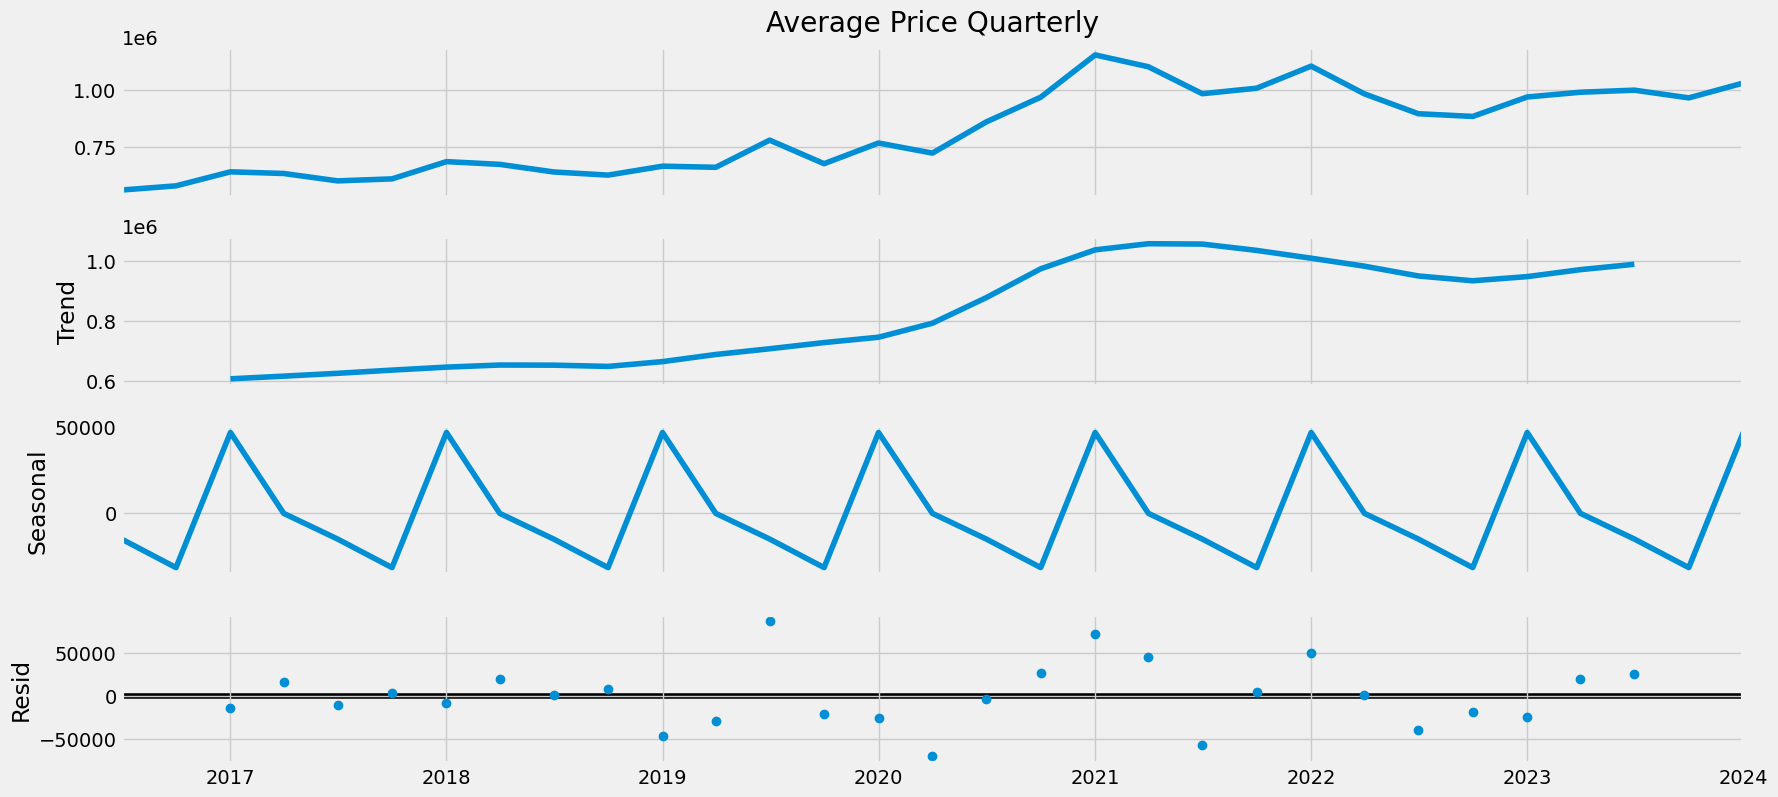

In [132]:
decom_avg_quart.plot()
plt.title('Average Price Quarterly',loc = 'center', pad=420)
plt.savefig(os.path.join(path, 'Visualizations', 'Average Price Quarterly'),bbox_inches='tight')
plt.show()

# Stationarity testing (Median Monthly)

In [133]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(median_month['median_list_price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.147848
p-value                         0.695619
Number of Lags Used            11.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


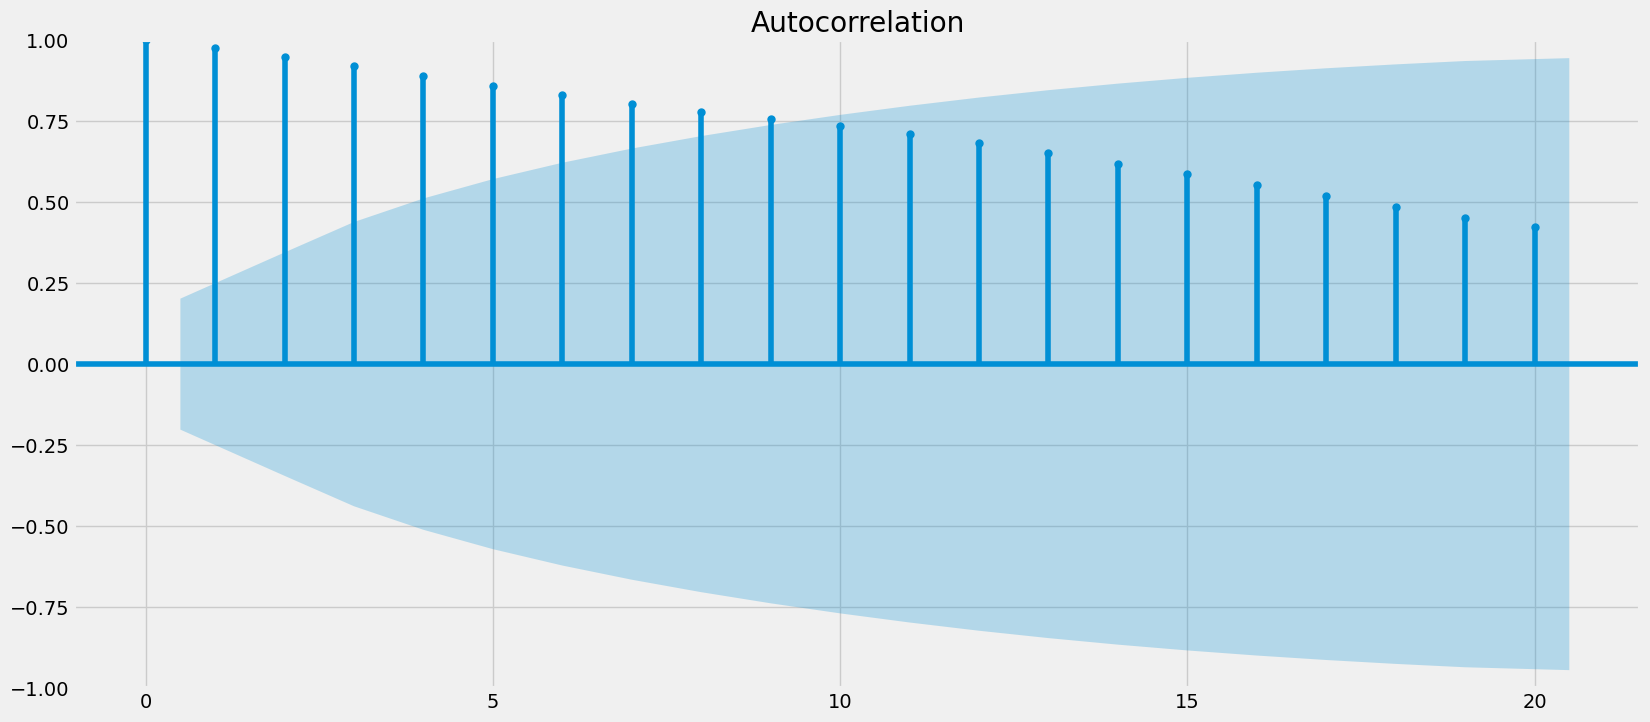

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(median_month)
plt.show()

# Stationarity testing (Median Quarterly)

In [70]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(median_quart['median_list_price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.007080
p-value                         0.750673
Number of Lags Used             4.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


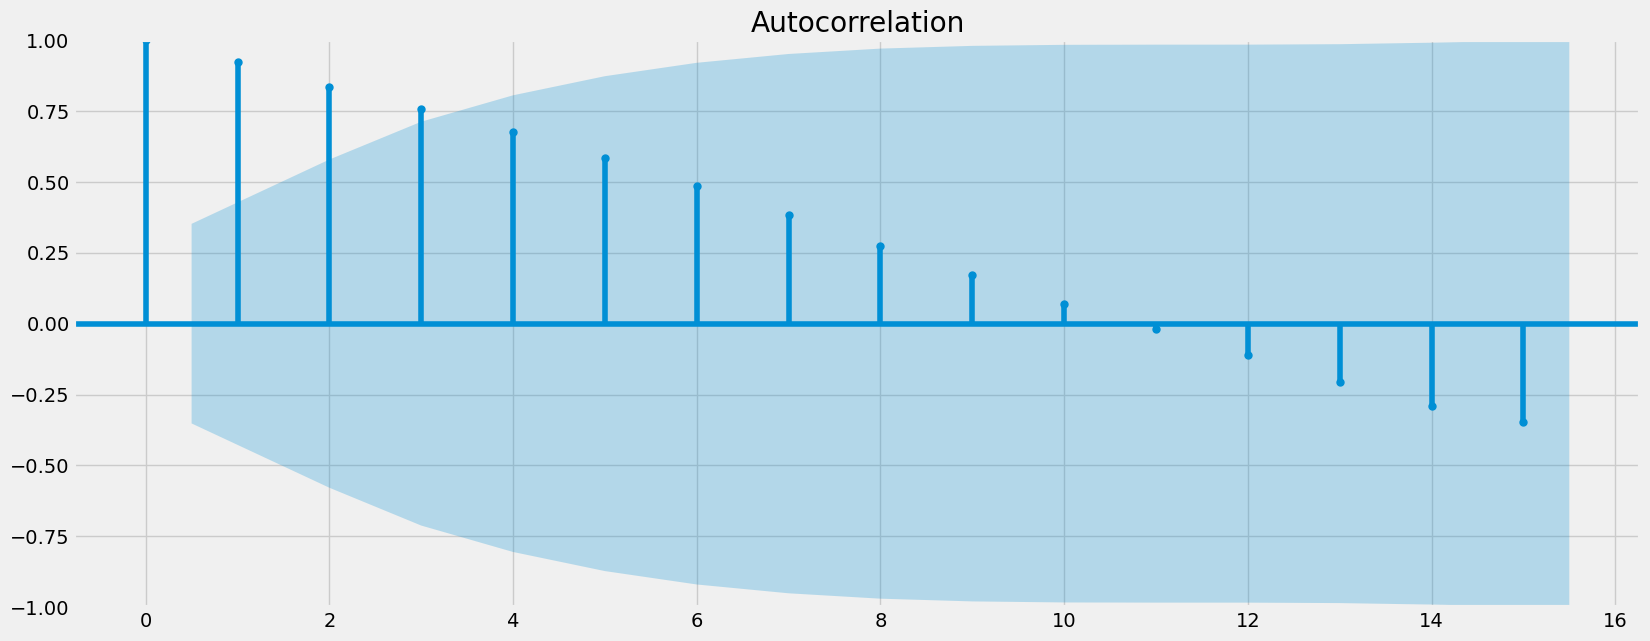

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(median_quart)
plt.show()

# Stationarity testing (Average Monthly)

In [72]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(avg_month['average_list_price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.680080
p-value                         0.441404
Number of Lags Used             1.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


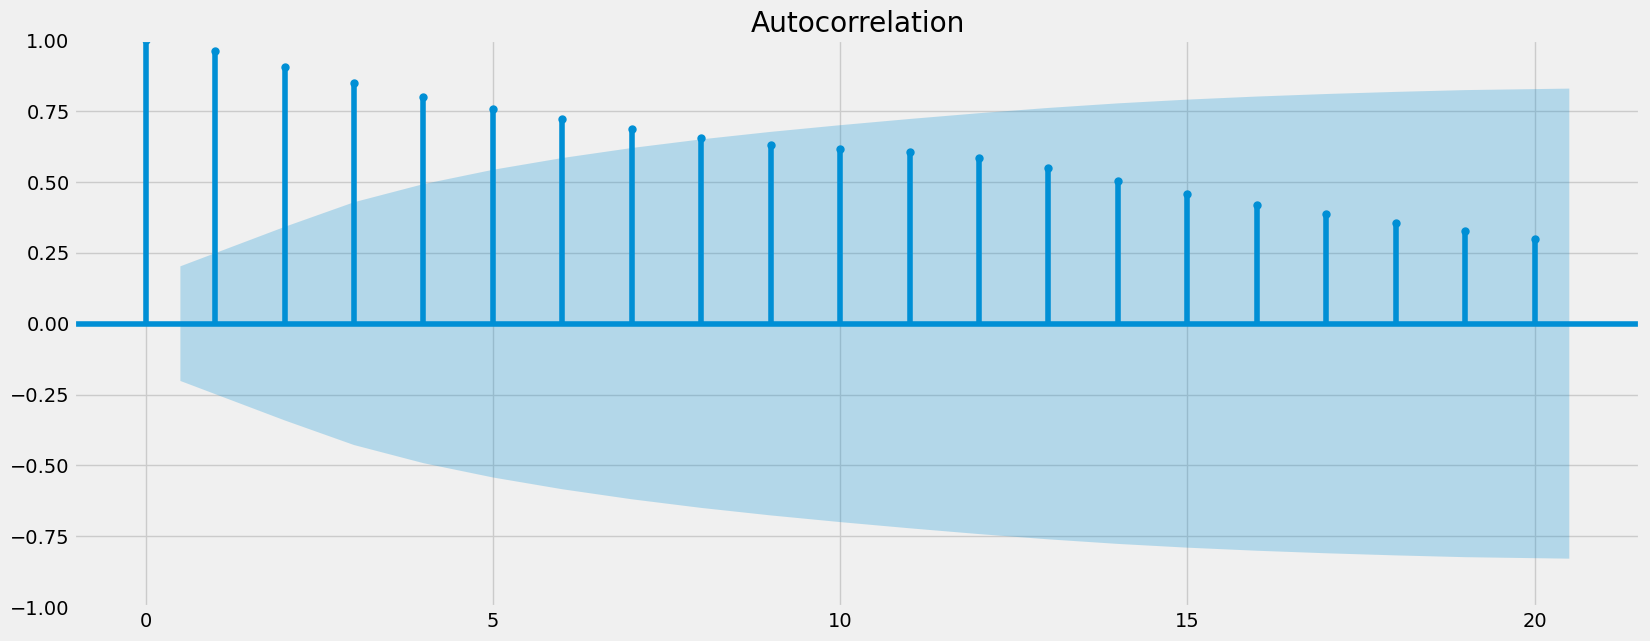

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(avg_month)
plt.show()

# Stationarity testing (Average Quarterly)

In [74]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(avg_quart['average_list_price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.293300
p-value                         0.632232
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


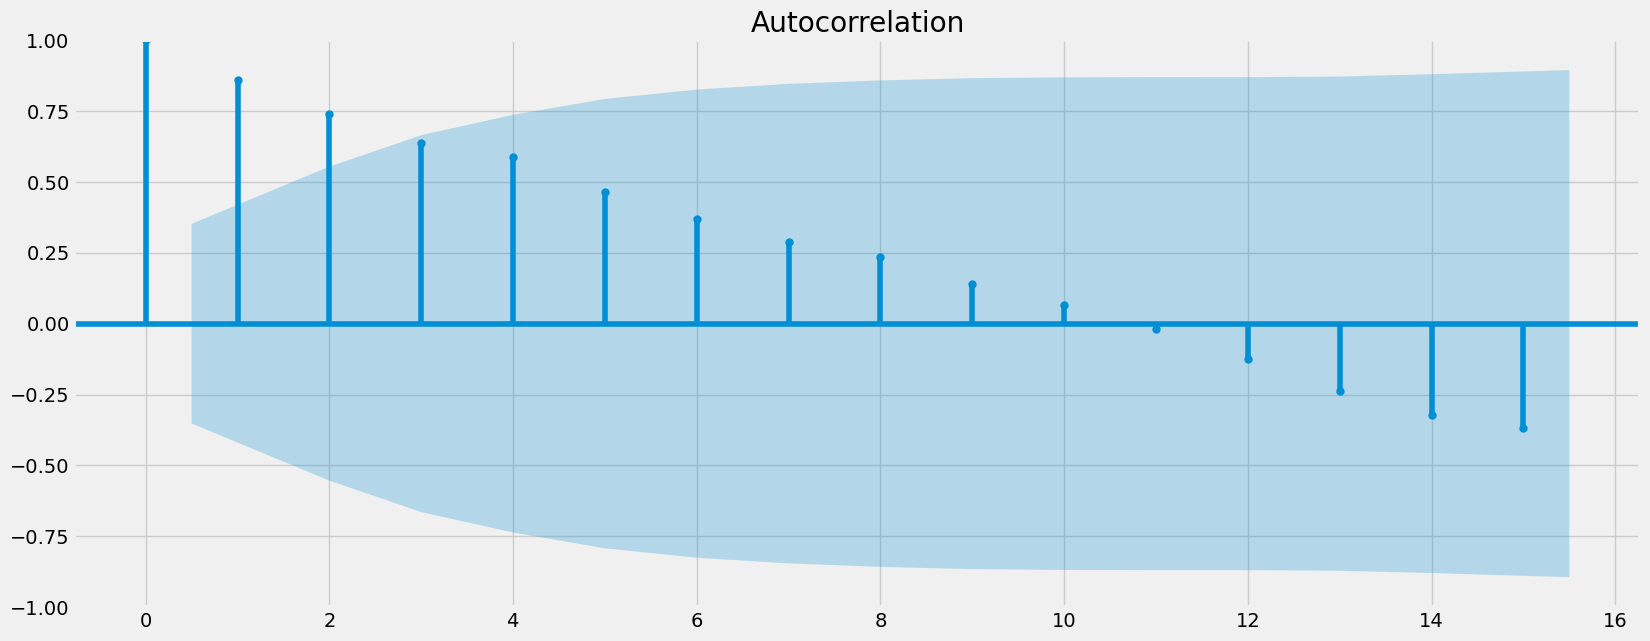

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(avg_quart)
plt.show()

# Stationarizing data Median Monthly.

In [76]:
mm_diff = median_month - median_month.shift(1)
mm_diff.dropna(inplace=True)
mm_diff.head()

,median_list_price
date,
2016-08-01,-50.0
2016-09-01,50.0
2016-10-01,1500.0
2016-11-01,2425.0
2016-12-01,2975.0


In [77]:
mm_diff.columns

Index(['median_list_price'], dtype='object')

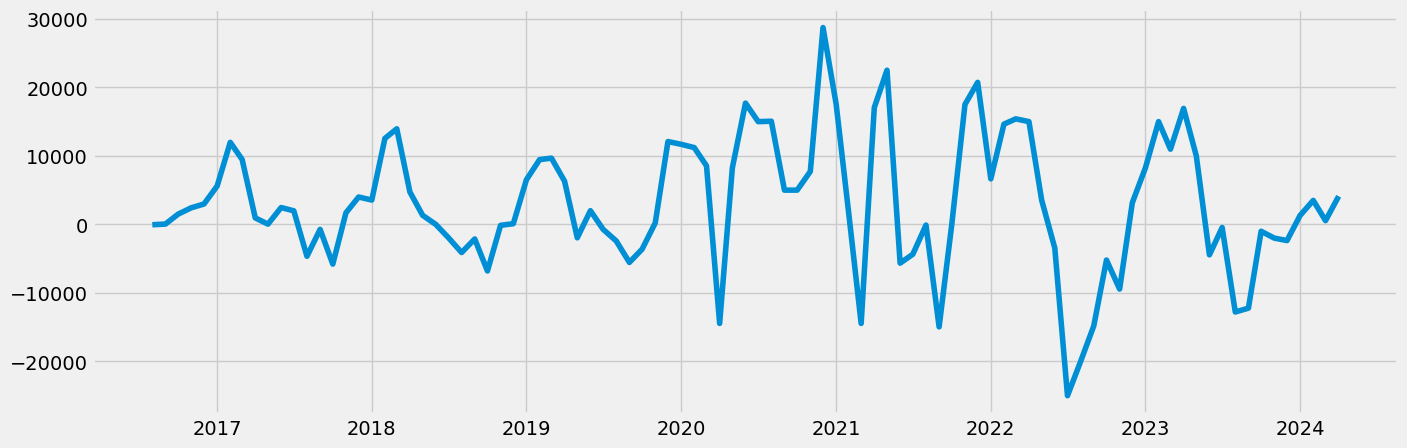

In [78]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(mm_diff)

In [79]:
dickey_fuller(mm_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.666139
p-value                         0.448638
Number of Lags Used            10.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


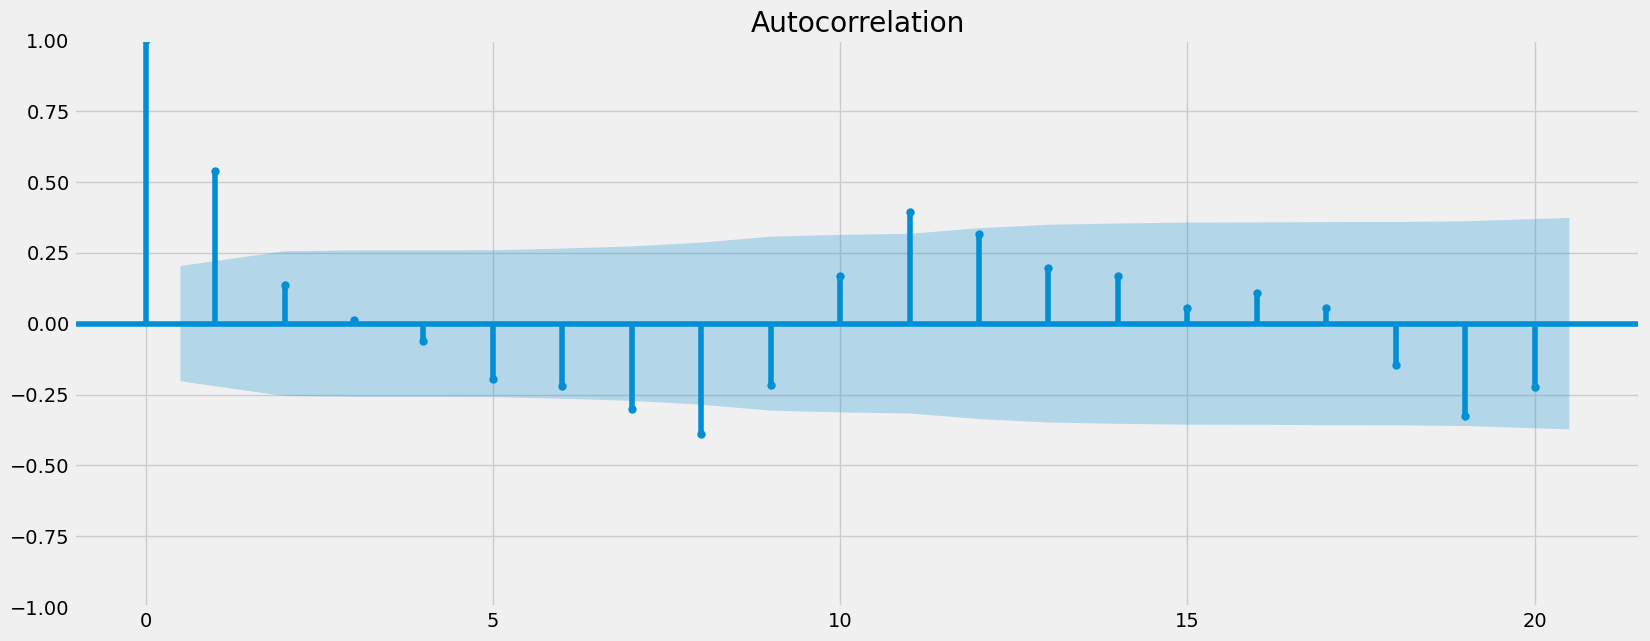

In [80]:
plot_acf(mm_diff)
plt.show()

# Stationarizing Median Quarterly.

In [81]:
mq_diff = median_quart - median_quart.shift(1)
mq_diff.dropna(inplace=True)
mq_diff.head()

,median_list_price
date,
2016-10-01,4125.00
2017-01-01,19533.34
2017-04-01,12104.33
2017-07-01,289.67
2017-10-01,-5365.67


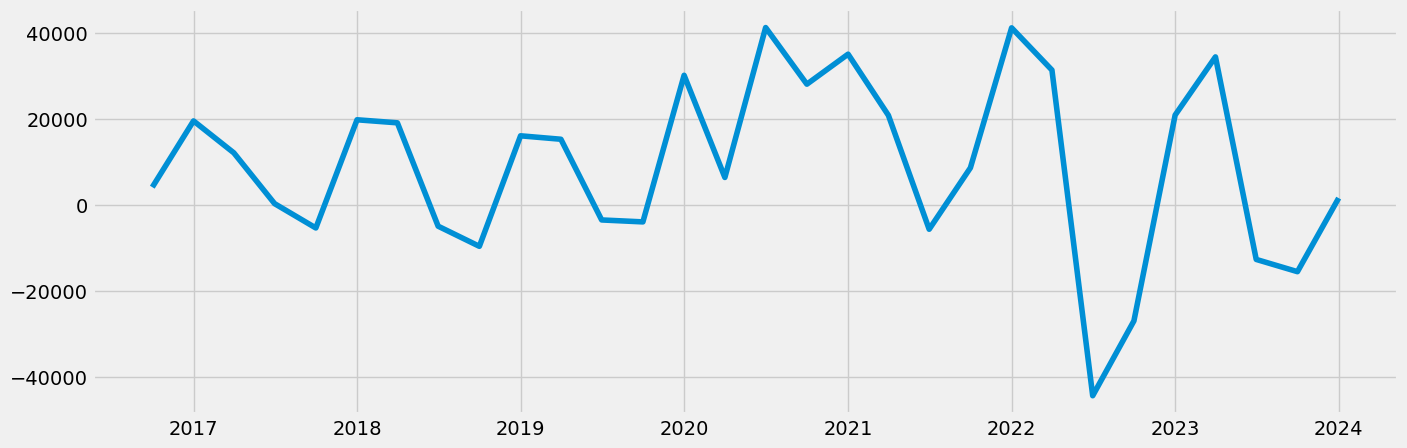

In [82]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(mq_diff)

In [83]:
dickey_fuller(mq_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.555769
p-value                         0.000002
Number of Lags Used             1.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


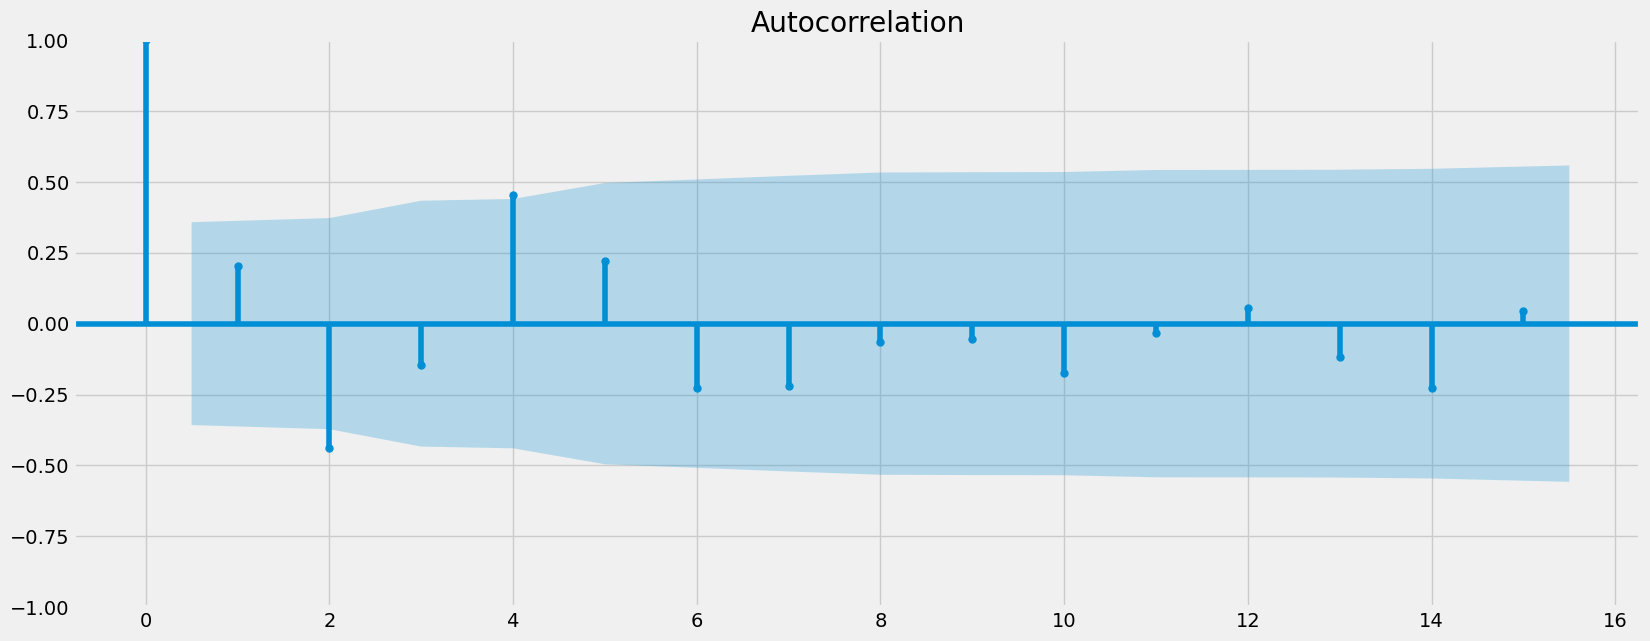

In [84]:
plot_acf(mq_diff)
plt.show()

# Stationarizing AVG Monthly.

In [85]:
am_diff = avg_month - avg_month.shift(1)
am_diff.dropna(inplace=True)
am_diff.head()

,average_list_price
date,
2016-08-01,759.0
2016-09-01,5276.0
2016-10-01,3250.0
2016-11-01,3235.0
2016-12-01,27734.0


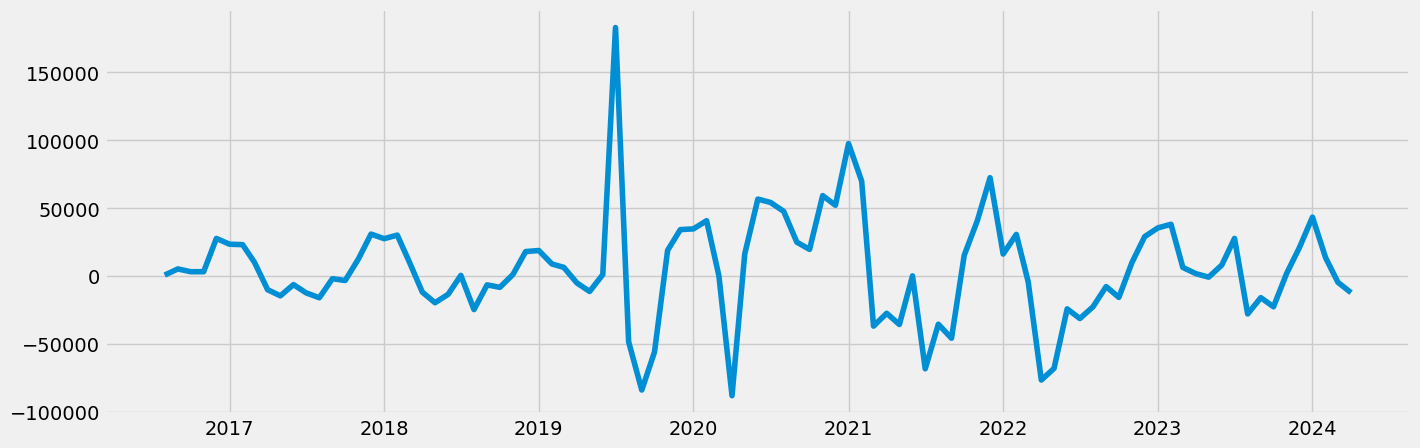

In [86]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(am_diff)

In [87]:
dickey_fuller(am_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.166572e+00
p-value                        6.966747e-08
Number of Lags Used            1.000000e+00
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64


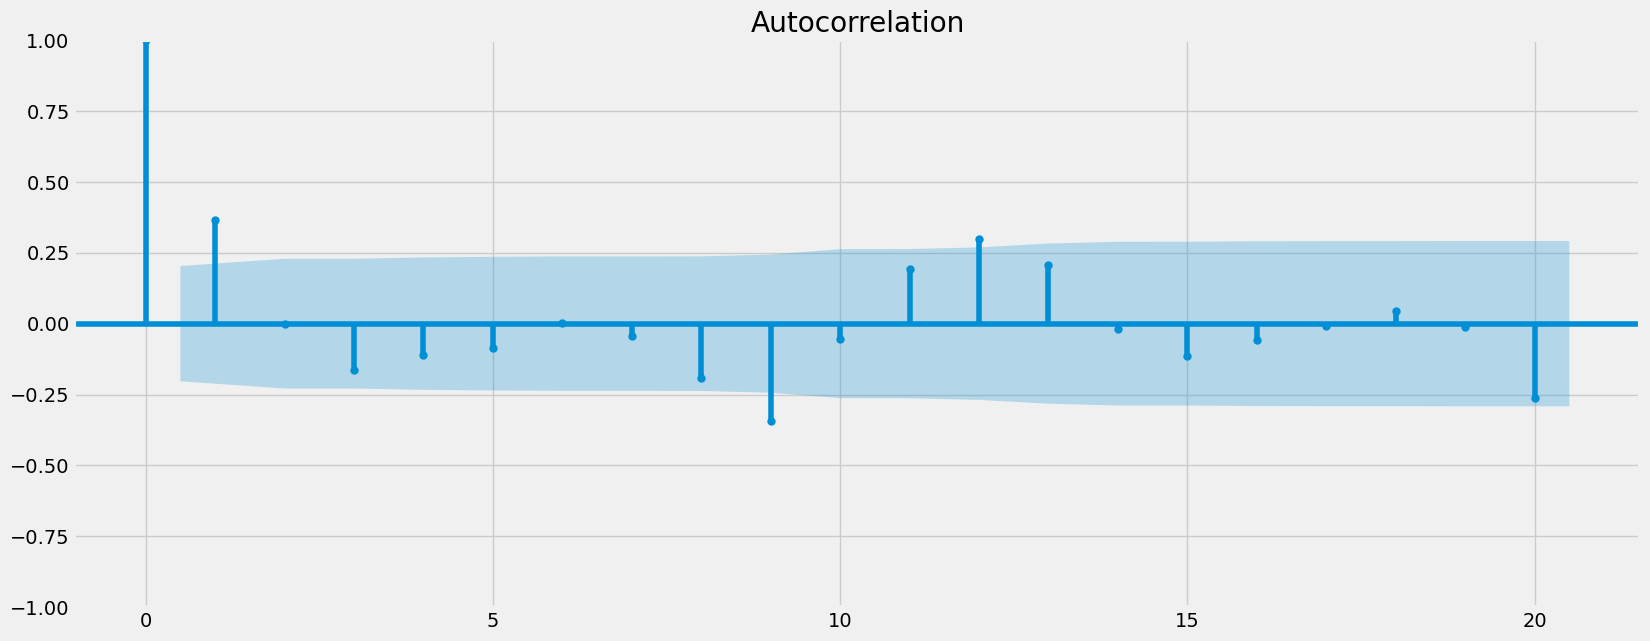

In [88]:
plot_acf(am_diff)
plt.show()

# Stationarizing AVG Quarterly.

In [89]:
aq_diff = avg_quart - avg_quart.shift(1)
aq_diff.dropna(inplace=True)
aq_diff.head()

,average_list_price
date,
2016-10-01,18421.66
2017-01-01,61838.00
2017-04-01,-7344.33
2017-07-01,-32572.67
2017-10-01,8849.00


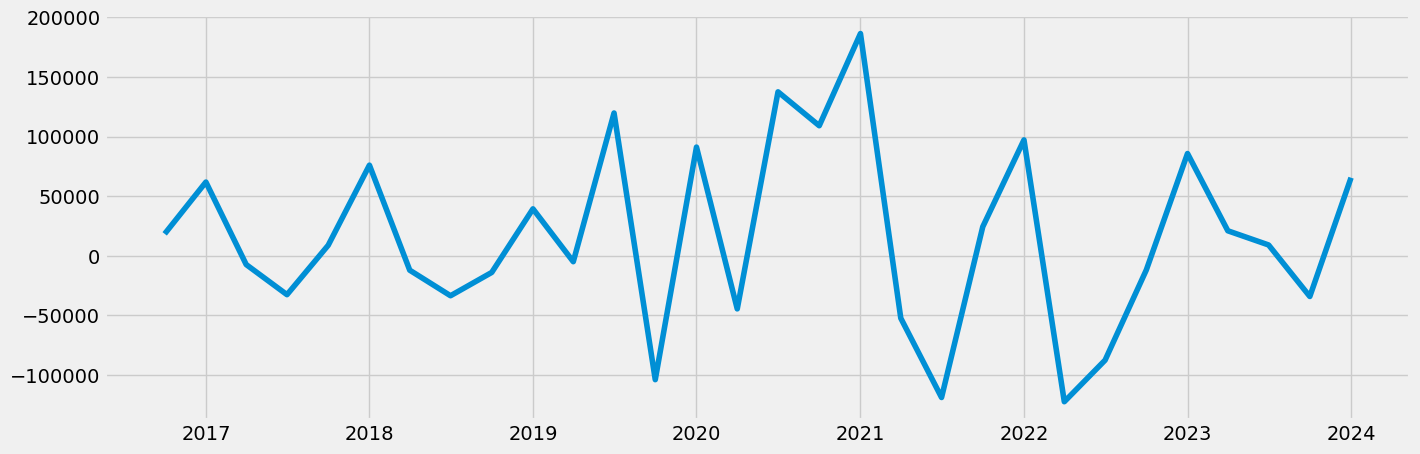

In [90]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(aq_diff)

In [91]:
dickey_fuller(aq_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.439303
p-value                         0.000003
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


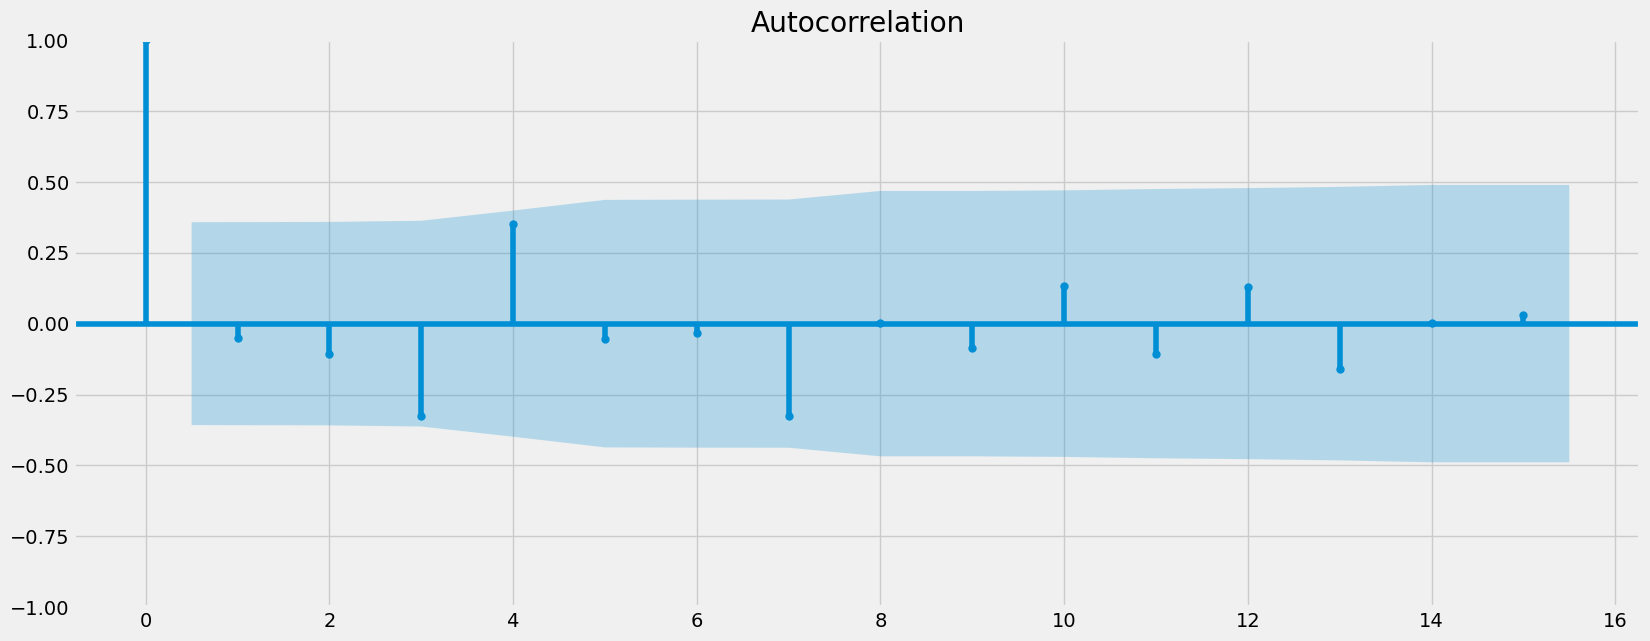

In [92]:
plot_acf(aq_diff)
plt.show()

What was very interesting to me was that the quarterly median and average tests had a p-value of less than .05 on the first run. Our monthly median and average tests, however, did not have a v-value of less than .05, in fact, they were significantly greater.  